<a href="https://colab.research.google.com/github/SohaHussain/Machine-Learning/blob/main/Linear%20Regression/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('Housing.csv')

In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.shape

(545, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Visualising the data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### visualising numeric variables

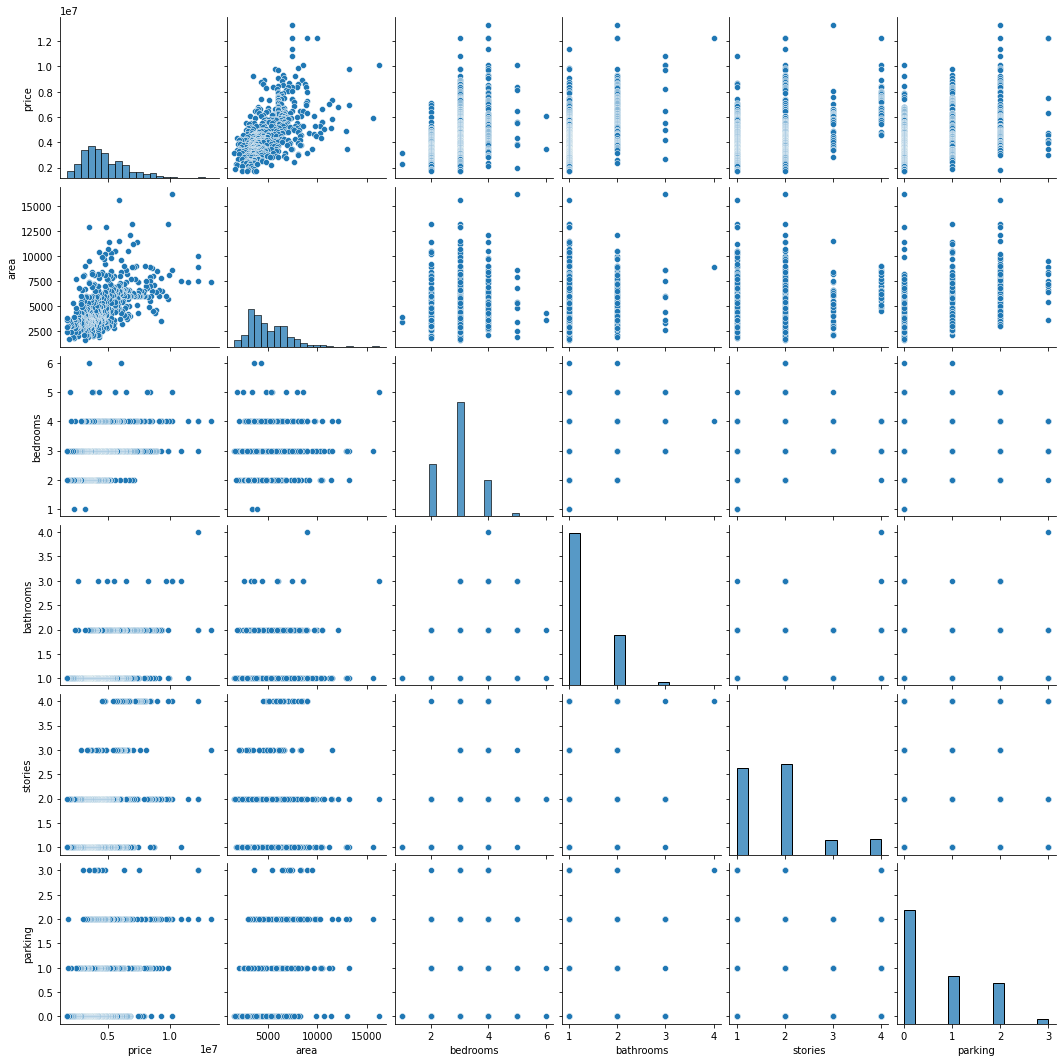

In [9]:
# pairplot of all numeric variables

sns.pairplot(data)
plt.show()

#### visualising categorical data

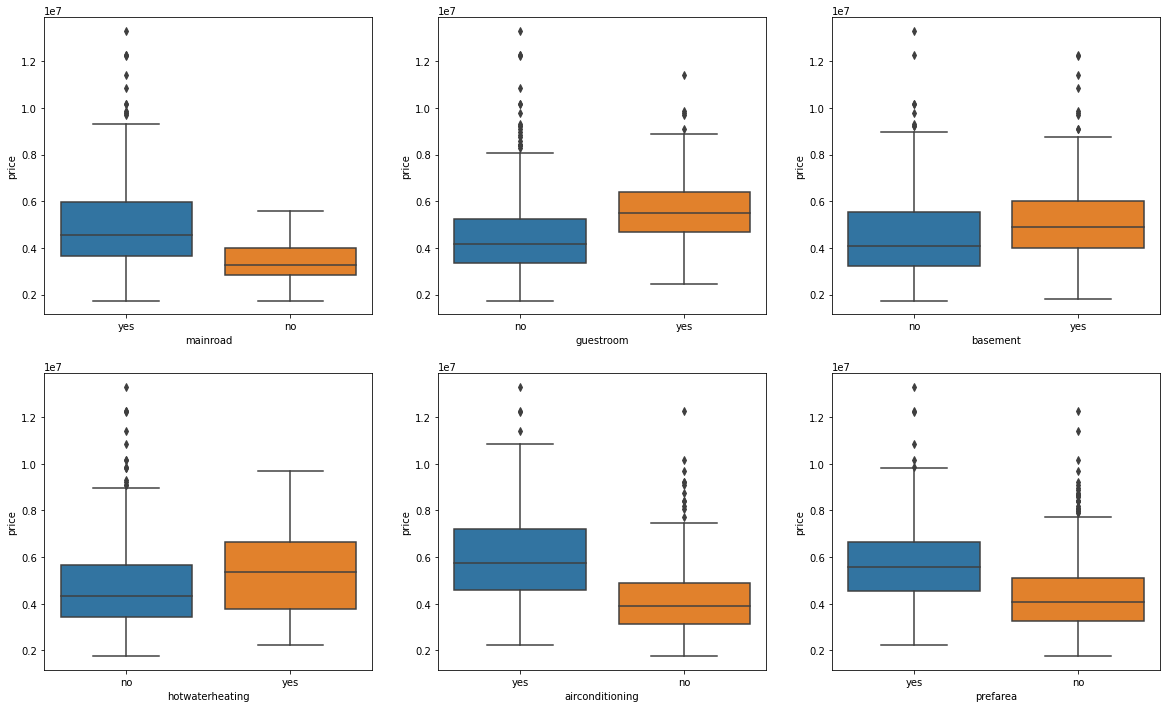

In [11]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='prefarea',y='price',data=data)
plt.show()

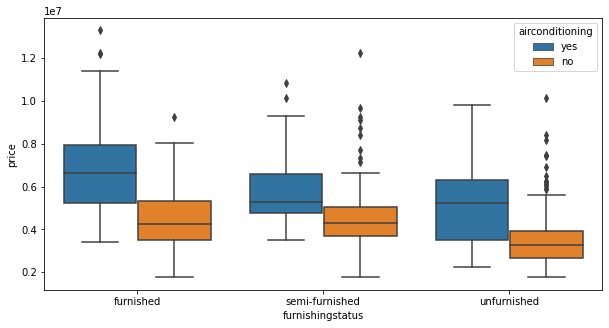

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=data)
plt.show()


## Data preparation

#### converting categorical variables to numeric variables

In [13]:
# list of variables to map
variables = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

# defining map function
def map_variables(x):
  return x.map({'no':0,'yes':1})

data[variables] = data[variables].apply(map_variables)

In [14]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Dummy variables

---
using dummy variables for `furnishingstatus`

In [15]:
status = pd.get_dummies(data['furnishingstatus'])

In [16]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


dropping the `furnished` column, as the type of furnishing can be identified with just the last two columns  — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [17]:
status = pd.get_dummies(data['furnishingstatus'],drop_first = True)

In [18]:
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [19]:
# adding result to the orginal dataframe
data = pd.concat([data,status],axis = 1)

In [20]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [21]:
# dropping furnishingstatus from the dataframe
data.drop(['furnishingstatus'],axis=1,inplace = True)

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting data into training and test sets

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
# specify random.seed as 0 so that train and test set always have the same rows
np.random.seed(0)

df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

---
Since all the columns, except for `area` have small integer values, it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients, which might affect our model performance.

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
# applying scaler() to all the columns except dummy and yes/no variables
vars = ['area','bedrooms','bathrooms','stories','parking','price']

df_train[vars] = scaler.fit_transform(df_train[vars])

In [30]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [31]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


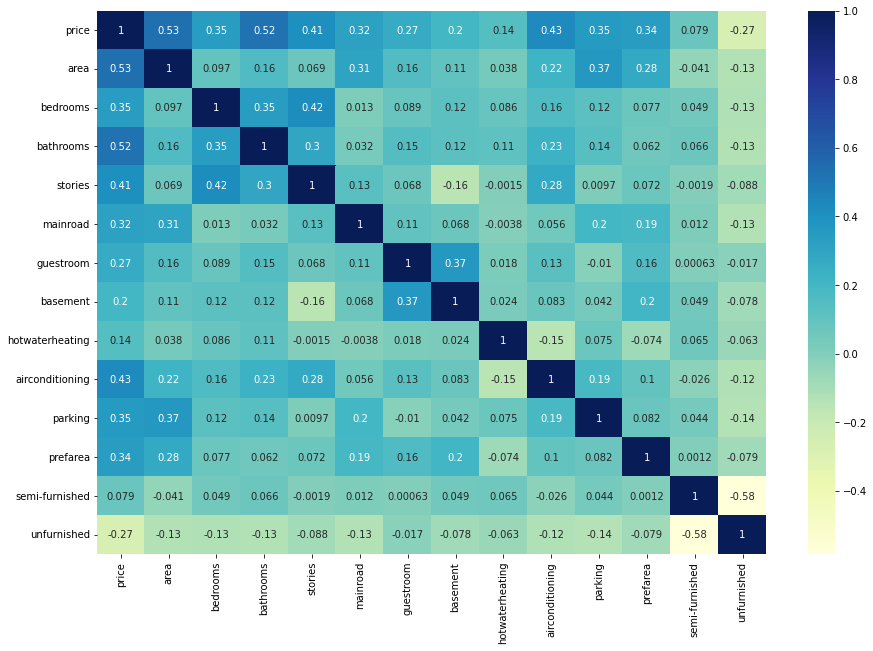

In [32]:
# checking correlation

plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

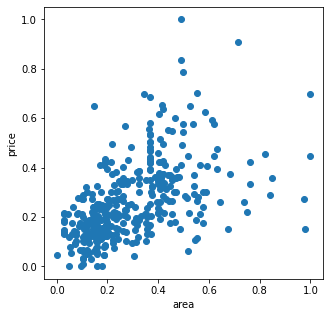

In [36]:
# area is correlated to price the most

plt.figure(figsize = (5,5))
plt.scatter(df_train.area,df_train.price)
plt.xlabel('area')
plt.ylabel('price')
plt.show()

---
we pick `area` as the first variable and try to fit a regression line to that.

## Building a linear model

In [37]:
y_train = df_train.pop('price')
x_train = df_train

In [38]:
import statsmodels.api as sm

# Add a constant
x_train_lm = sm.add_constant(x_train[['area']])

# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm).fit()

In [39]:
lr.params

const    0.126894
area     0.462192
dtype: float64

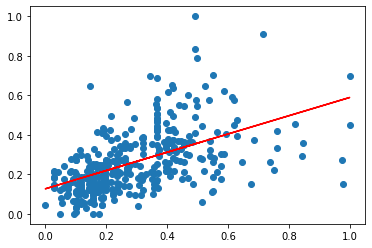

In [40]:
plt.scatter(x_train_lm.iloc[:, 1], y_train)
plt.plot(x_train_lm.iloc[:, 1], 0.127 + 0.462*x_train_lm.iloc[:, 1], 'r')
plt.show()

In [41]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.15e-29
Time:                        11:52:55   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

#### adding another variable

adding the second most highly correlated variable, `bathrooms`.

In [42]:
# Assign all the feature variables to X
x_train_lm = x_train[['area', 'bathrooms']]

In [43]:
x_train_lm = sm.add_constant(x_train_lm)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.51e-54
Time:                        11:55:18   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

---
adjusted R-squared value has gone up to 0.477 from 0.281. Let's go ahead and add another variable, `bedrooms`.

In [45]:
x_train_lm = x_train[['area', 'bathrooms','bedrooms']]
x_train_lm = sm.add_constant(x_train_lm)
lr = sm.OLS(y_train, x_train_lm).fit()
lr.params

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64

In [46]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.12e-57
Time:                        12:05:46   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

---
adding all the variables to the model

In [47]:
x_train_lm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train, x_train_lm).fit()
lr_1.params

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64

In [48]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           8.83e-83
Time:                        12:07:14   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021     

#### checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


## Dropping the variable and updating the model

In [52]:
# Dropping highly correlated and insignificant variables

x = x_train.drop('semi-furnished', 1,)

In [53]:
x_train_lm = sm.add_constant(x)
lr_2 = sm.OLS(y_train, x_train_lm).fit()

In [54]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           1.07e-83
Time:                        12:52:44   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019     

In [56]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [57]:
x = x.drop('bedrooms', 1)
x_train_lm = sm.add_constant(x)
lr_3 = sm.OLS(y_train, x_train_lm).fit()

In [58]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.73e-84
Time:                        12:55:04   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [59]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


## Residual Analysis of the train data

In [60]:
y_train_price = lr_3.predict(x_train_lm)

Text(0.5, 0, 'residuals')

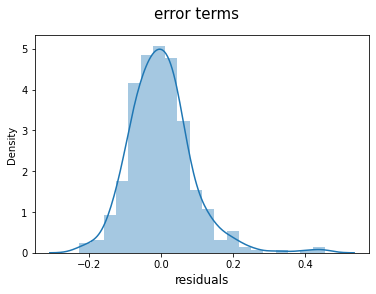

In [61]:
# histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price),bins = 20)
fig.suptitle('error terms', fontsize = 15)
plt.xlabel('residuals',fontsize = 12)

## Making predictions using the final model

#### applying scaling on test set

In [62]:
df_test[vars] = scaler.transform(df_test[vars])

In [63]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
y_test = df_test.pop('price')
x_test = df_test

In [65]:
x_test_m3 = sm.add_constant(x_test)
x_test_m3 = x_test_m3.drop(['bedrooms', 'semi-furnished'], axis = 1)

In [66]:
y_pred_m3 = lr_3.predict(x_test_m3)

## Model evaluation

Text(0, 0.5, 'y_pred')

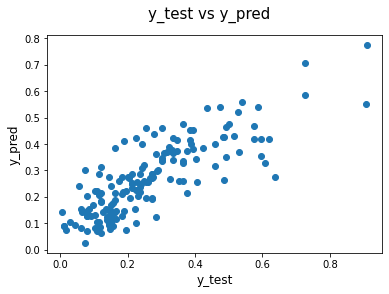

In [67]:
# plotting y_test vs y_pred

fig = plt.figure()
plt.scatter(y_test,y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 15)
plt.xlabel('y_test',fontsize=12)
plt.ylabel('y_pred',fontsize=12)
